Check your stack container version matches the setup instructions!

In [1]:
version = ! eups list -s lsst_distrib
print(f'You are running {version[0].split()[1]} of lsst_distrib')

You are running w_2021_21 of lsst_distrib


Check your packages are setup, as per the setup instructions. Each of the ones setup should appear here. If they don't, you've missed the line in your .user_setups file

In [2]:
! eups list -s | grep LOCAL

Redirect the logger outputs (stack and Spectractor) to the notebook:

In [3]:
from lsst.log.utils import enable_notebook_logging
enable_notebook_logging()

Make a bulter, pick an image, and make a data reference to it:

In [4]:
import lsst.daf.persistence as dafPersist
butler = dafPersist.Butler('/project/shared/auxTel/')

dataId = {'dayObs': '2020-03-15', 'seqNum': 162}
dataRef = butler.dataRef('raw', **dataId)

<ipython-input-4-574db15c6d5a>:2: FutureWarning: Gen2 Butler has been deprecated (Butler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = dafPersist.Butler('/project/shared/auxTel/')
<ipython-input-4-574db15c6d5a>:2: FutureWarning: Gen2 Butler has been deprecated (LatissMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = dafPersist.Butler('/project/shared/auxTel/')
LsstCamMapper WARN: Unable to find valid calib root directory
CameraMapper INFO: Loading exposure registry from /lsstdata/offline/teststand/auxTel/L1Archiver/gen2repo/registry.sqlite3
CameraMapper INFO: Loading calib registry from /project/shared/auxTel/CALIB/calibRegistry.sqlite3


Instantiate the task, set our config options

In [5]:
from lsst.atmospec import ProcessStarTask

config = ProcessStarTask.ConfigClass()
config.doDisplayPlots = True  # show the plots in the notebook
config.spectractorDebugMode = True  # make all the debug plots along the way
config.binning = 4

# pretty minimal ISR because some things we don't have the calib products available for
# most of this would be picked up automatically if running from the command line from config files
config.isr.doLinearize = False
config.isr.doDark = False
config.isr.doFlat = False
config.isr.doFringe = False
config.isr.doDefect = True
config.isr.doCrosstalk = False
config.isr.doSaturationInterpolation = False

task = ProcessStarTask(config=config)

Set this so that the plots pop up in the notebook

In [6]:
%matplotlib inline

Run, and watch the debug plots roll in. If you've selected a writable rerun above, the result will also be butler.put() in there so you can butler.get() it later, but we can also catch the result as it's returned by the runDataRef() method

processStar INFO: Processing {'dayObs': '2020-03-15', 'seqNum': 162, 'expId': 2020031500162, 'detector': 0}
processStar.isr INFO: Performing ISR on sensor {'dayObs': '2020-03-15', 'seqNum': 162, 'expId': 2020031500162, 'detector': 0}.
obs.lsst.assembly WARN: DataId(initialdata={'dayObs': '2020-03-15', 'seqNum': 162, 'expId': 2020031500162, 'detector': 0}, tag=set()): outAmp.getRawBBox() != data.getBBox(); patching. ((minimum=(0, 0), maximum=(543, 2047)) v. (minimum=(0, 0), maximum=(575, 2047)))
AT_O_20200315_000162: Dark time less than exposure time. Setting dark time to the exposure time.
AT_O_20200315_000162: Dark time less than exposure time. Setting dark time to the exposure time.
Ignoring translator header fixup of LATISS None: 'MJD-OBS not found'
CameraMapper WARN: Cannot create SkyWcs using VisitInfo and Detector, using metadata-based SkyWcs: Cannot create SkyWcs from camera geometry: rotator angle defined using RotType=RotType.UNKNOWN instead of SKY.
processStar.isr INFO: Conve

Loading config from /home/mfl/lsst/atmospec/config/auxtel.ini


lsst.atmospec.spectraction WARN: Supplementary parameter already existed CALLING_CODE in parameters, use overrideParameters() to override already existing keys instead.
lsst.atmospec.spectraction INFO: Starting SPECTRACTOR
2021-06-07 19:16:12,242 Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=0.727720735836133 but average of self.read_out_noise is 1.0.


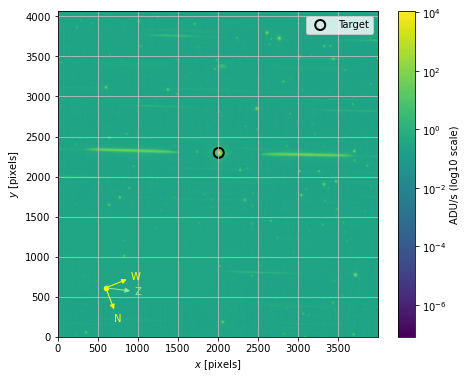

lsst.atmospec.spectraction INFO: Pixel value at centroid = 9484.376041666666
lsst.atmospec.spectraction INFO: Rebinning image with rebin of 4


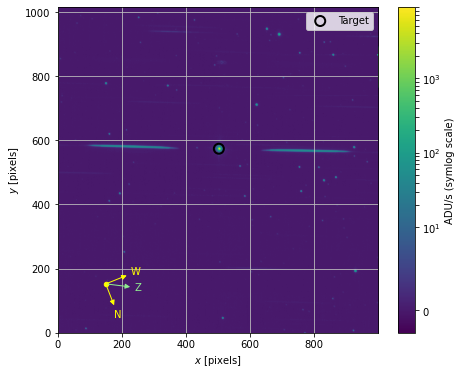

lsst.atmospec.spectraction INFO: Search for the target in the image...


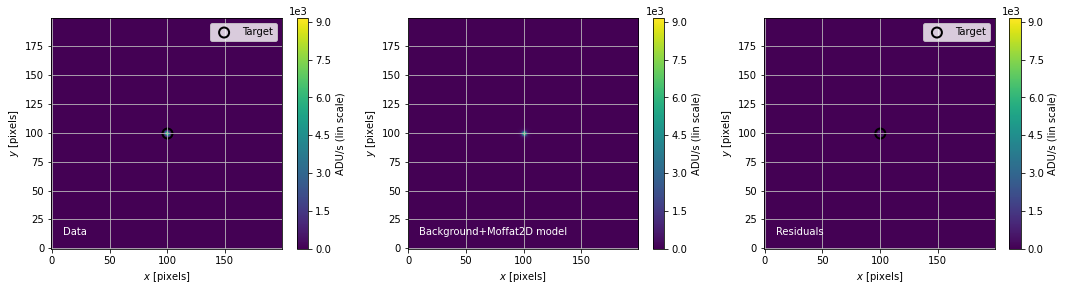

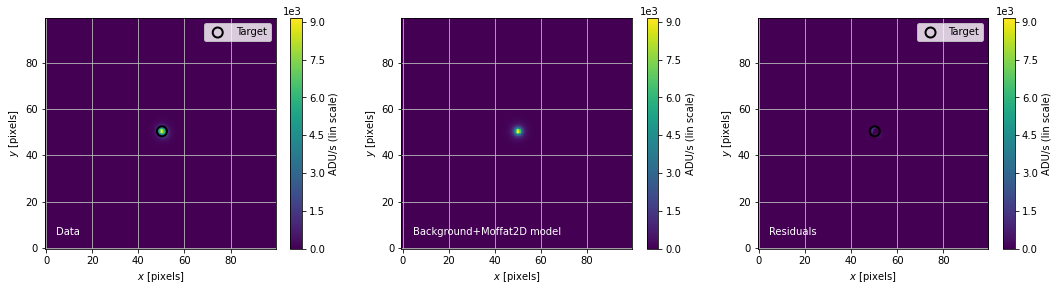

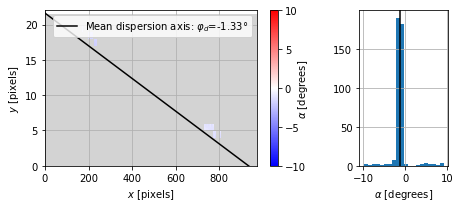

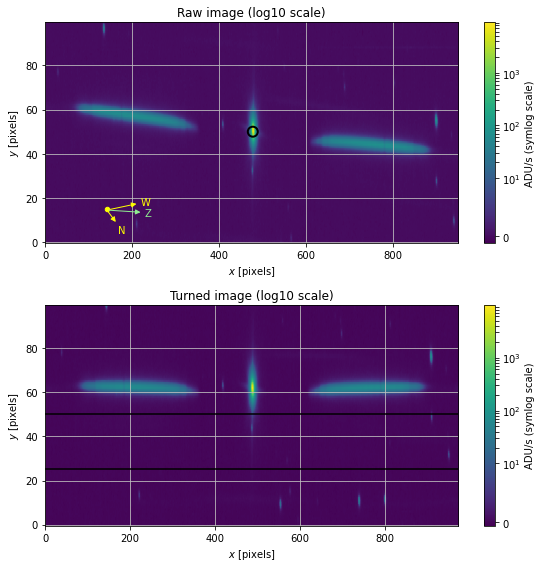

lsst.atmospec.spectraction INFO: Search for the target in the rotated image...


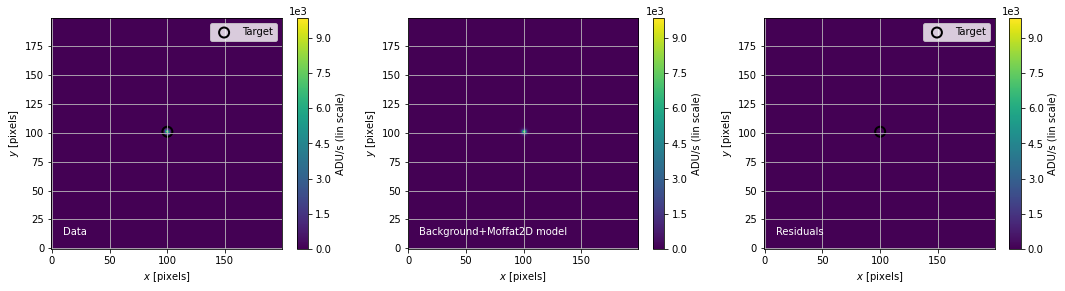

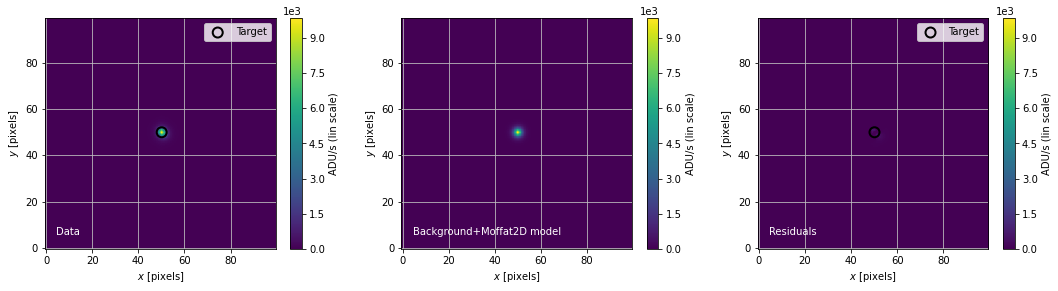

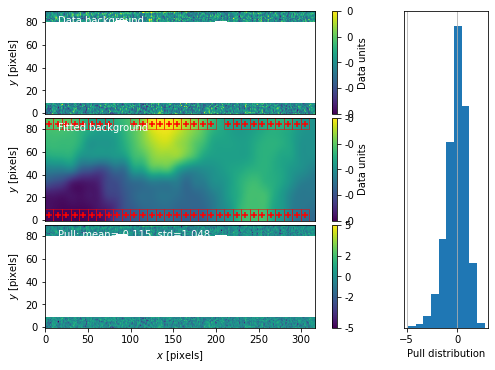

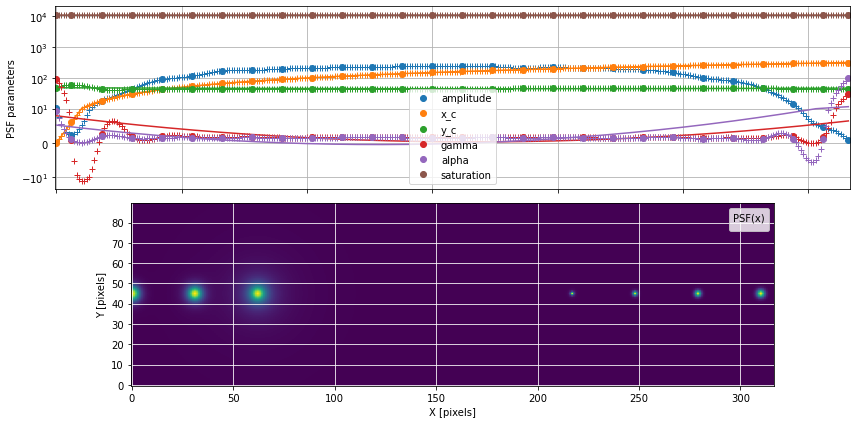

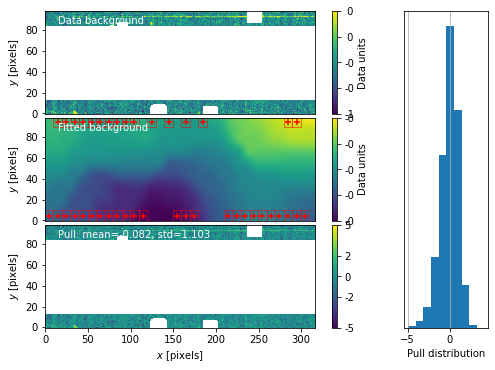

/home/mfl/.conda/envs/merlin-lsst-scipipe-rubinenv-0.6/lib/python3.8/site-packages/scipy/optimize/_minimize.py:535: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  warn('Method %s cannot handle constraints nor bounds.' % method,
/home/mfl/lsst/Spectractor/spectractor/fit/fitter.py:1296: OptimizeWarning: Unknown solver options: gtol, maxls, maxcor
  result = optimize.minimize(nll, fit_workspace.p, method=minimizer_method,
2021-06-07 19:17:09,949 ChromaticPSF fit_chromatic_psf    WARNING 
	Trace of final covariance matrix (797.966822301831) is below the trace of the prior covariance matrix (3752.599586203865). This is probably due to a very high regularisation parameter in case of a bad fit. Therefore the final covariance matrix is mulitiplied by the ratio of the traces and the amplitude parameters are very close the amplitude priors.


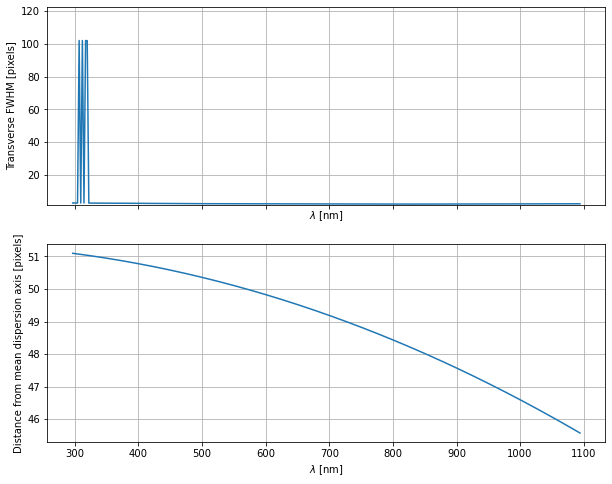

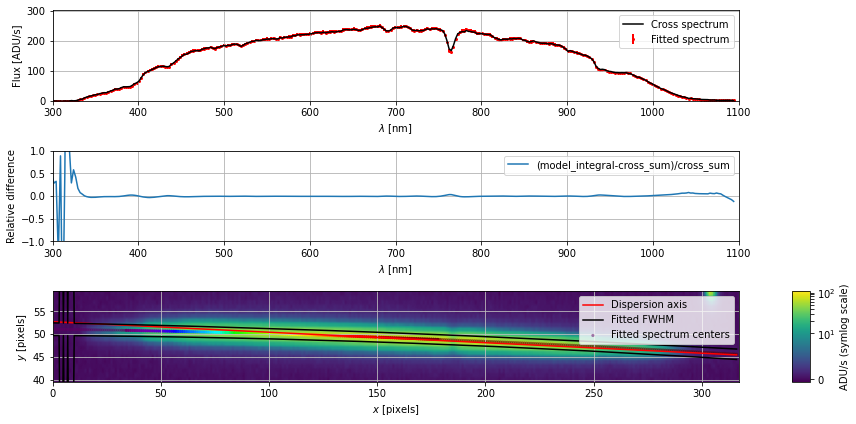

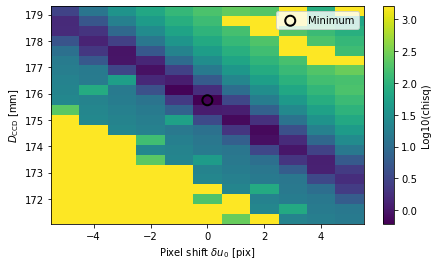

2021-06-07 19:17:21,238 Spectrum   convert_from_flam_to_ADUrate WARNING You ask to convert spectrum already in ADU/s in ADU/s... check your code ! Skip the instruction


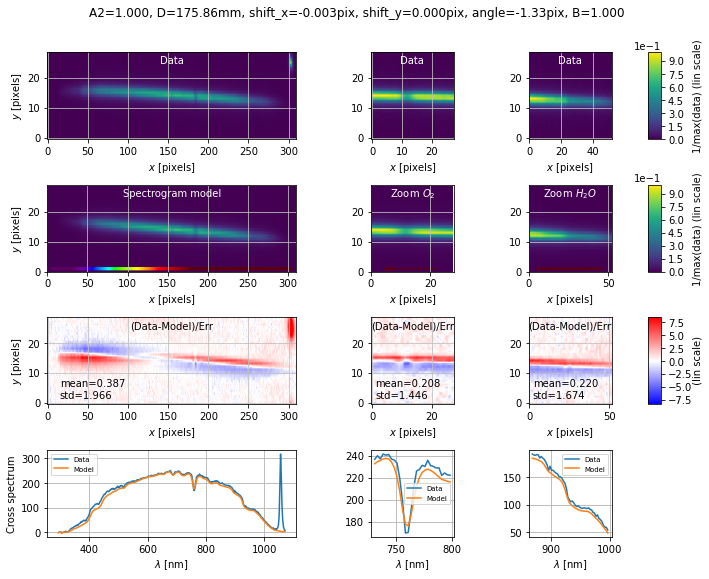

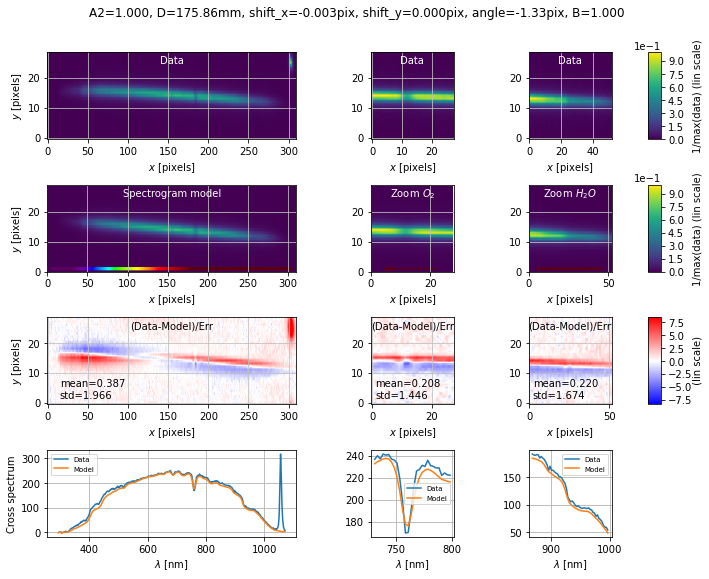

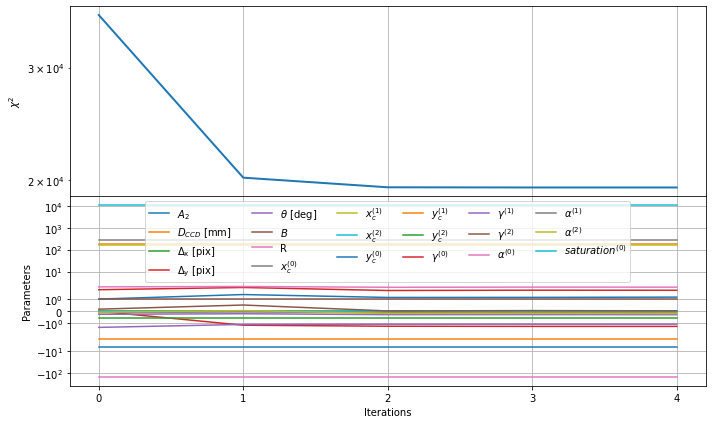

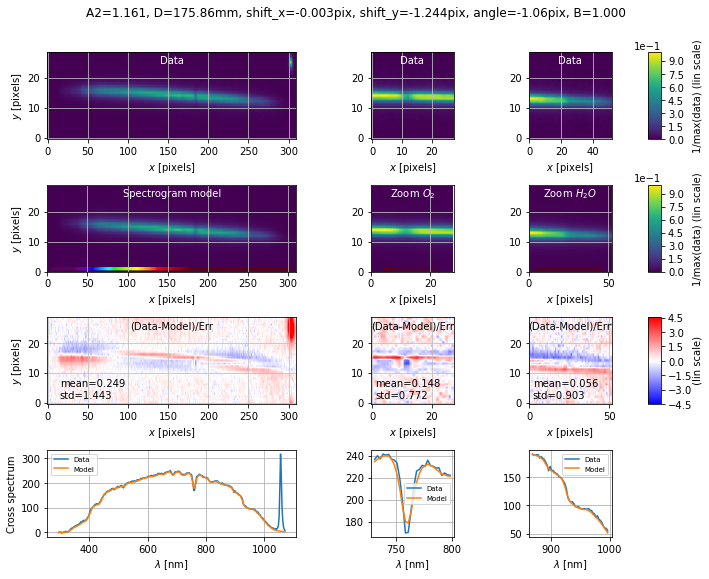

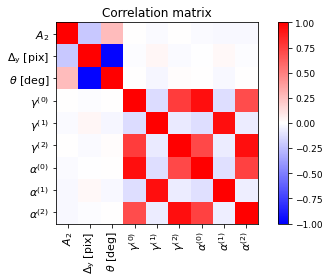

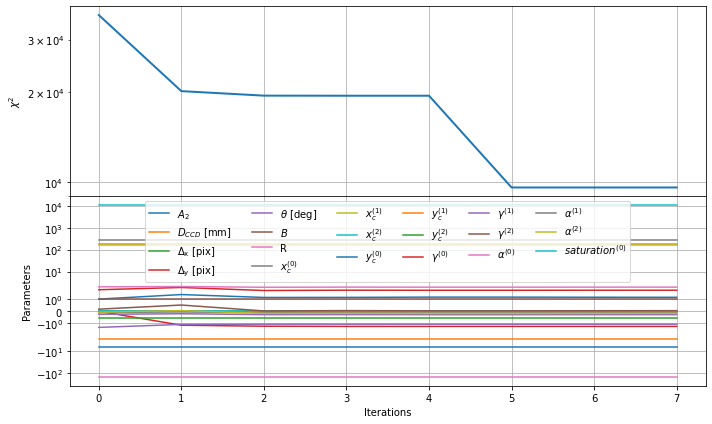

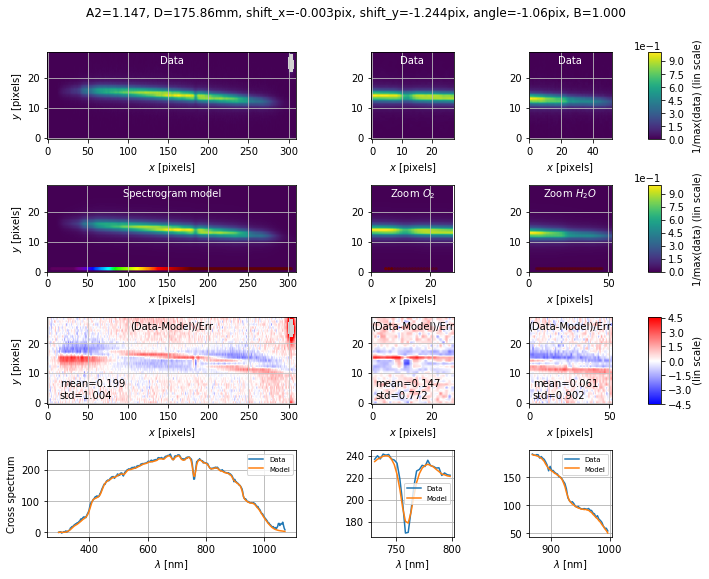

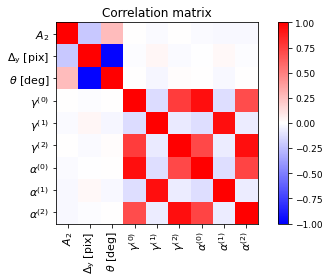

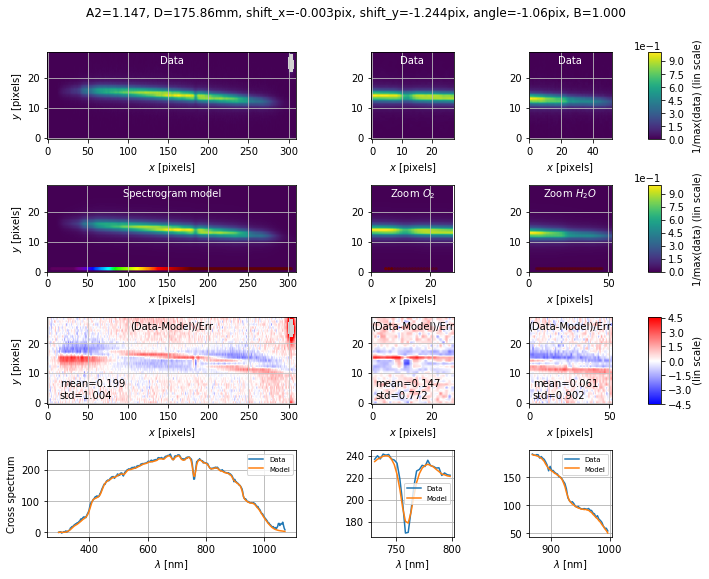

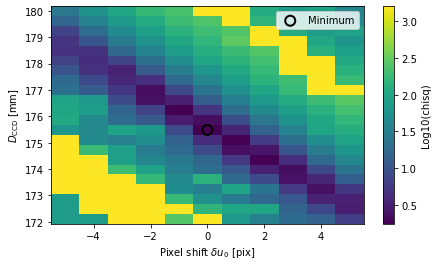

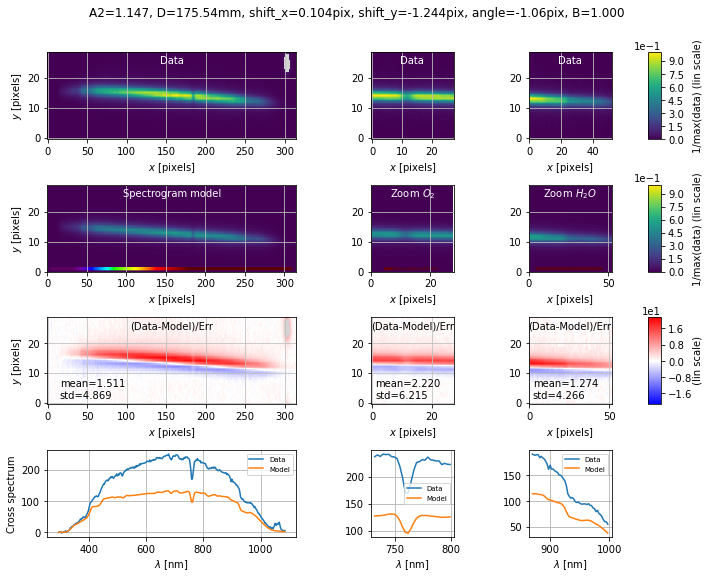

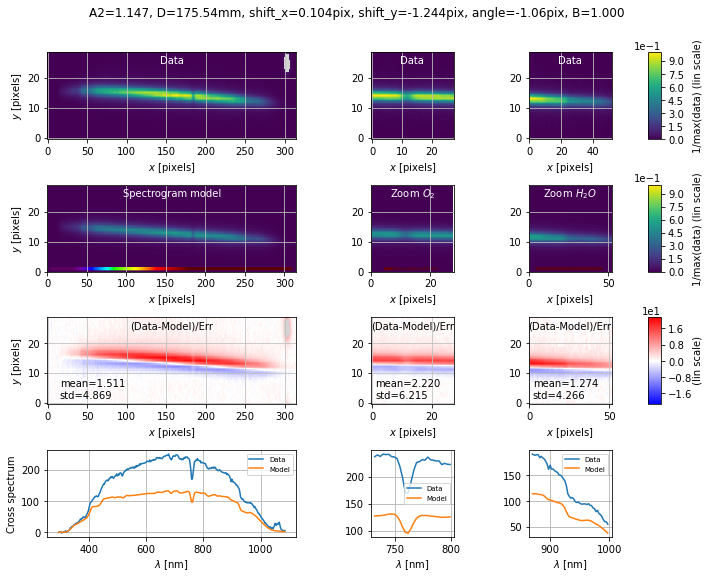

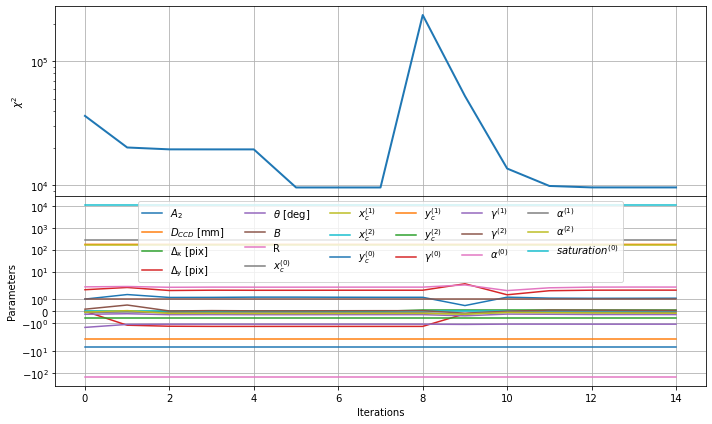

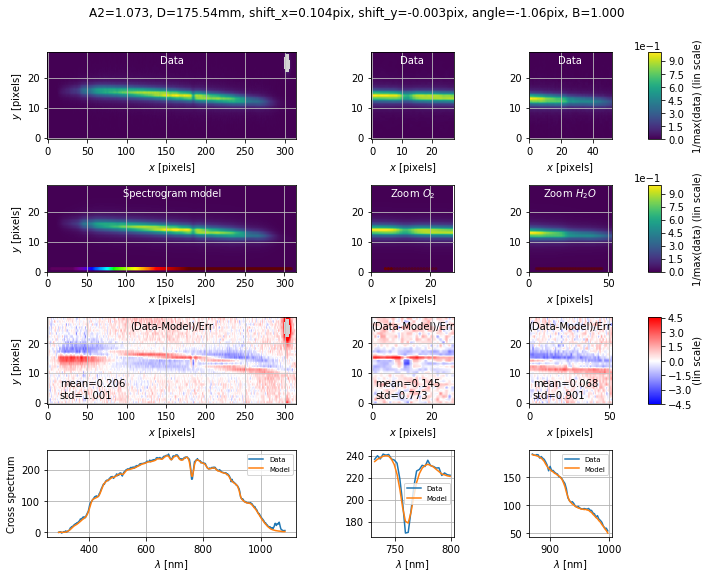

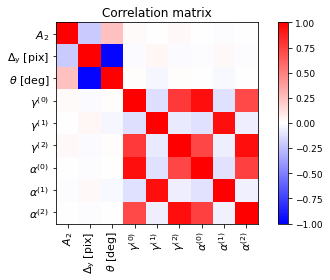

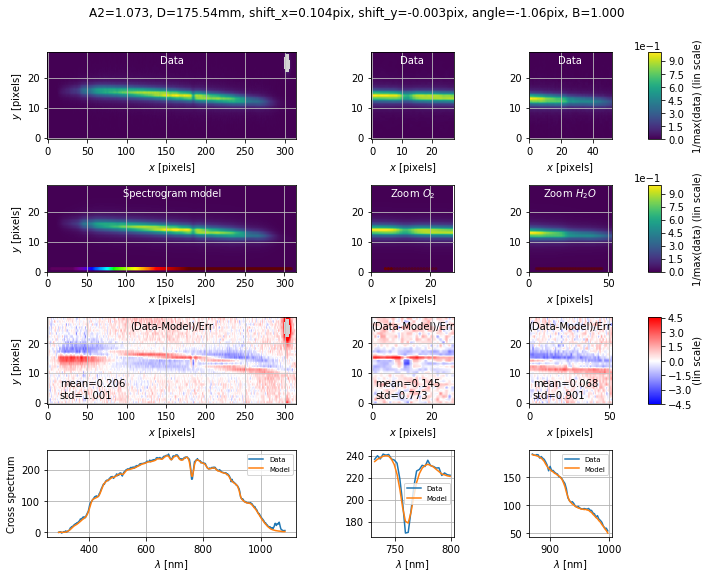

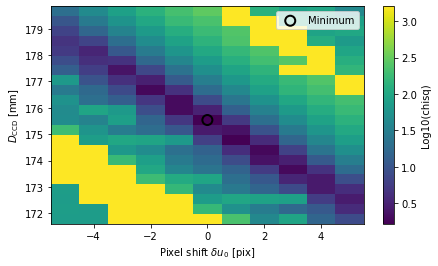

2021-06-07 19:19:16,510 astroquery _showwarning         WARNING VerifyWarning: Card is too long, comment will be truncated.
processStar INFO: Finished processing {'dayObs': '2020-03-15', 'seqNum': 162, 'expId': 2020031500162, 'detector': 0}
processStar INFO: Successfully ran to completion in 214.0s for {'dayObs': '2020-03-15', 'seqNum': 162, 'expId': 2020031500162, 'detector': 0}


In [7]:
result = task.runDataRef(dataRef)